## Observations and Insights 

1) The bar plot suggests that the data generated from the study may be reliable because there is a substantially equal distribution of mice undergoing each drug regimen.
2) The pie chart demonstrates an equal distributin of male and female mice involved in the study.
3) The box plot suggests that Capomulin and Ramicane were more successful than Infubinol and Ceftamin.
4) A line plot depiction of treatment data of mice receiving Capomulin shows a samll decrease in tumore volume over time.
5) The scatter plot displays a higher Mouse weight correlates with higher average tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Change Mouse ID from object to integer
study_results['Mouse ID']=study_results['Mouse ID'].astype(str)
mouse_metadata['Mouse ID']=mouse_metadata['Mouse ID'].astype(str)

# Combine the data into a single dataset
combine_df=study_results.merge(mouse_metadata, on='Mouse ID')

# Display the data table for preview
combine_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
len(combine_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combine_df.groupby(["Mouse ID", "Timepoint"]).size()

Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
                      ..
z969      25           1
          30           1
          35           1
          40           1
          45           1
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)


Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
j235      0            1
i177      10           1
          20           1
          25           1
          30           1
dtype: int64

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_df=combine_df.set_index('Mouse ID').drop('g989')

In [6]:
# Checking the number of mice in the clean DataFrame.
combine_df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
z969      45           1
i386      20           1
i334      10           1
          15           1
          20           1
          25           1
          30           1
          35           1
          40           1
          45           1
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combine_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combine_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
combine_df=combine_df.reset_index()
combine_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


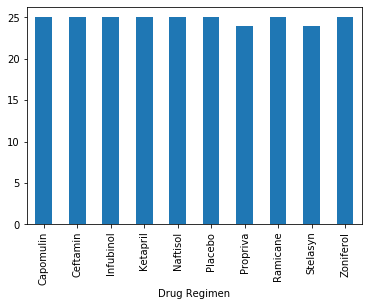

In [24]:
combine_df.groupby('Drug Regimen')['Mouse ID'].nunique().plot(kind='bar')

Text(0, 0.5, 'Number of Mice')

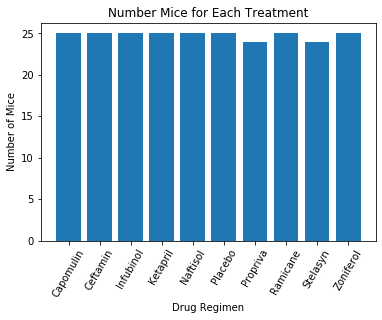

In [36]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen_df=combine_df.groupby('Drug Regimen')['Mouse ID'].nunique()
plt.bar(data=regimen_df, height=regimen_df, x=regimen_df.index)
plt.xticks(rotation=60)
plt.title('Number Mice for Each Treatment', fontsize=12)
plt.xlabel('Drug Regimen')
plt.ylabel("Number of Mice")

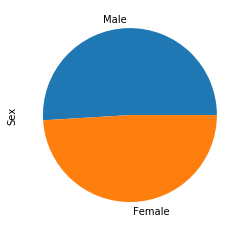

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combine_df['Sex'].value_counts().plot(kind='pie')


Text(0.5, 1.0, 'Mice by Sex')

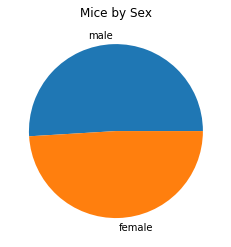

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(combine_df['Sex'].value_counts(), labels=['male', 'female'])
plt.title('Mice by Sex')


## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
#combine_df[combine_df['Timepoint']==45]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

combine_df.merge(combine_df.groupby('Mouse ID')['Timepoint'].max(), on='Mouse ID')
tumormax_df=combine_df.merge(combine_df.groupby('Mouse ID')['Timepoint'].max(), on='Mouse ID')
tumormax_df[tumormax_df['Timepoint_x']==tumormax_df['Timepoint_y']]
tumormax_xy_df=tumormax_df[tumormax_df['Timepoint_x']==tumormax_df['Timepoint_y']]

In [66]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
voldata=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvol=tumormax_xy_df[tumormax_xy_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    
    # add subset 
    voldata.append(tumorvol)
    
    # Determine outliers using upper and lower bounds
    

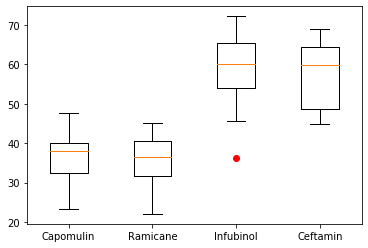

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(voldata, labels=treatments, sym='ro')
plt.show()

## Line and Scatter Plots

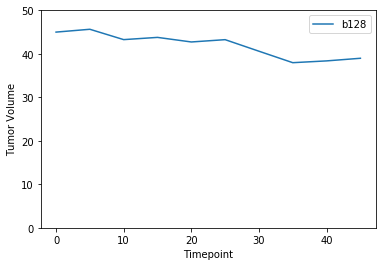

In [77]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combine_df[combine_df['Mouse ID']=='b128'].plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')
plt.legend(['b128'])
plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint')
plt.ylim(0,50)
plt.show()

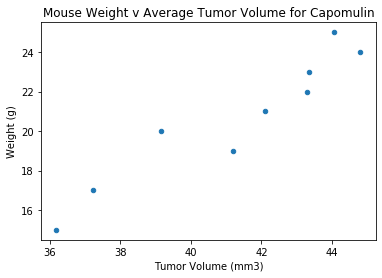

In [84]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df=combine_df[combine_df['Drug Regimen']=='Capomulin']
cap_df[['Tumor Volume (mm3)', 'Weight (g)']].groupby('Weight (g)').mean().reset_index().plot(kind='scatter', x='Tumor Volume (mm3)', y='Weight (g)')
plt.title('Mouse Weight v Average Tumor Volume for Capomulin')
plt.show()

## Correlation and Regression

Slope is 0.8947726097340616
Intercept is 22.764229983591925


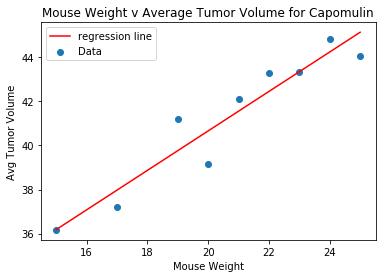

In [87]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
meanvol_by_weight_df=cap_df[['Tumor Volume (mm3)', 'Weight (g)']].groupby('Weight (g)').mean().reset_index()

x = meanvol_by_weight_df['Weight (g)']
y = meanvol_by_weight_df['Tumor Volume (mm3)']

slope, intercept, r_value, p_value, std_err = st.linregress(x,y)

print(f'Slope is {slope}')
print(f'Intercept is {intercept}')

plt.scatter(x,y,label = 'Data')
plt.plot(x, intercept + slope*x, 'r', label='regression line')

plt.xlabel("Mouse Weight")
plt.ylabel('Avg Tumor Volume')
plt.title('Mouse Weight v Average Tumor Volume for Capomulin')
plt.legend()
plt.show()